In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cvxopt import matrix, solvers
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from matplotlib.patches import FancyArrowPatch
from collections import Counter
import math

## Load the dataset


In [44]:
df=pd.read_csv('Loan_default.csv')
df.head(10)

df_second_test=pd.read_csv('Loan_default.csv')
df_second_test.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [45]:
df.shape

(255347, 18)

In [46]:
df_second_test.rename(columns={'Default':'LoanApproved'})

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,LoanApproved
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [47]:
df.rename(columns={'Default':'LoanApproved'})

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,LoanApproved
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


## Preprocess data


### Encode

In [48]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# List of columns to encode (those that are categorical)
categorical_columns = ['Education','EmploymentType','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))
    df_second_test[col] = label_encoder.fit_transform(df_second_test[col].astype(str))

df['LoanID']=label_encoder.fit_transform(df['LoanID'].astype(str))
df_second_test['LoanID']=label_encoder.fit_transform(df_second_test['LoanID'].astype(str))

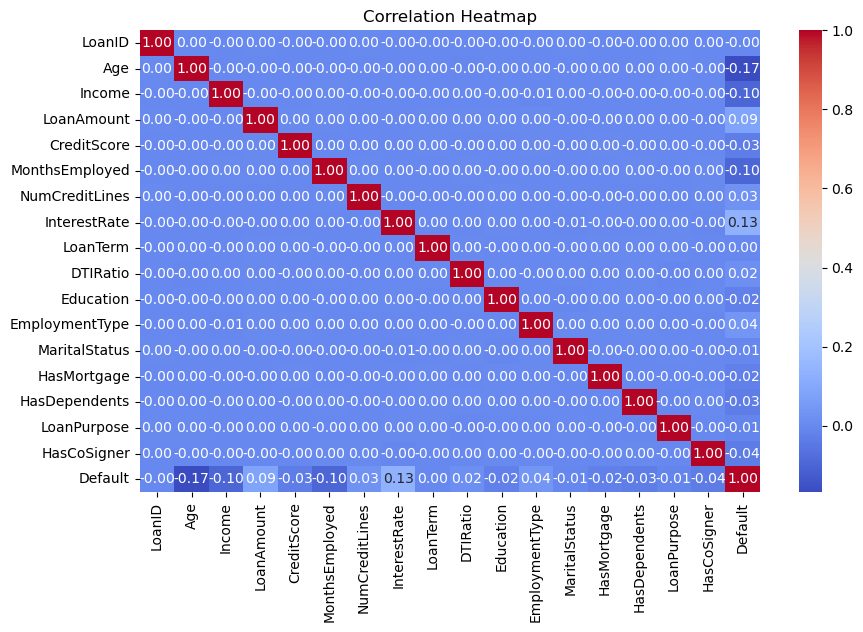

In [49]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
df.isnull().sum()


LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [15]:
df.duplicated().sum()

0

## Feature Engineering

### Risk factors that influence loan:
    * Employment Status and Income Stability
    * Borrower’s Financial History and Behavior (let s consider - flag on own reality, car and phone)

In [123]:
df['IncomeToLoanRatio'] = df['Income'] / df['LoanAmount']

df['CreditUtilization'] = df['NumCreditLines'] / df['CreditScore']

df['MonthlyIncomeToRepaymentRatio'] = (df['Income'] / 12) - (df['LoanAmount'] / df['LoanTerm'])

df['InterestRateToLoanAmountRatio'] = df['InterestRate'] / df['LoanAmount']


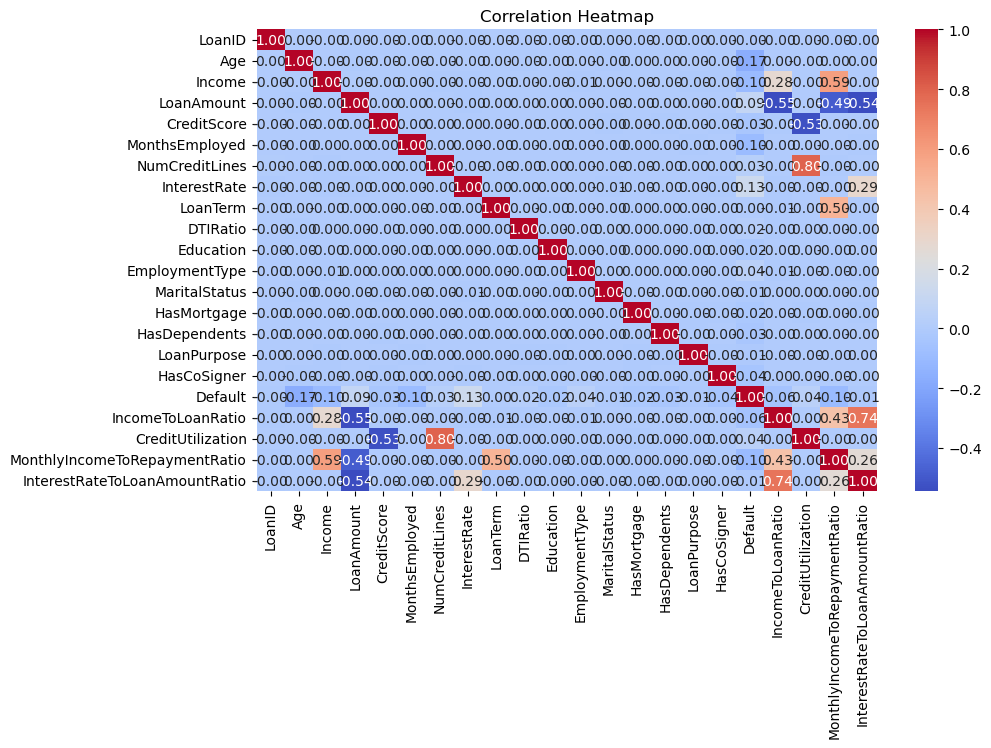

In [51]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
def compute_kernel_matrix(x, y, kwargs):

    kernel_type = kwargs['kernel_type']

    result = None

    ######## YOUR CODE HERE ########

    #print(x.shape)
    #print(y.shape)

    if kernel_type == 'linear':
        #print(x.shape)
        #print(y.shape)
        result = x @ y.T # dot product between x and x's transpose - to create the kernel matrix

    if kernel_type == 'polynomial':
        c = kwargs['c']
        degree = kwargs['degree']
        result = (x @ y.T + c) ** degree

    if kernel_type == 'gaussian':
        gamma = kwargs['gamma']
        sq_dists = np.sum(x**2, axis=1).reshape(-1, 1) + np.sum(y**2, axis=1) - 2 * np.dot(x, y.T)
        result = np.exp(-gamma * sq_dists)
    ################################

    return result

In [69]:
def find_alpha_soft(X, y, K, C):

    n_samples, n_features = X.shape
    P_numpy, q_numpy, G_numpy, h_numpy, A_numpy, b_numpy = None, None, None, None, None, None

    # Convert inputs to cvxopt format
    ######### YOUR CODE HERE #########

    y = y.reshape(-1,1) #shape it as a vector of (n_samples,1)

    yyt = y @ y.T #compute yi*yj

    P_numpy = yyt * K #matrix multiplication between each line and each column for y, them multiplied by matrix K
    q_numpy = -np.ones(n_samples)
    G_numpy = np.vstack((-np.eye(n_samples), np.eye(n_samples)))
    h_numpy = np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)) #not convinced about this
    A_numpy = y.reshape(1,-1)
    b_numpy = np.zeros(1)

    ##################################

    # Convert inputs to cvxopt format
    P = matrix(P_numpy, tc='d')
    q = matrix(q_numpy, tc='d')
    G = matrix(G_numpy, tc='d')
    h = matrix(h_numpy, tc='d')
    A = matrix(A_numpy, tc='d')
    b = matrix(b_numpy, tc='d')

    # Solve the QP problem to find Lagrange multipliers alpha
    solution = solvers.qp(P, q, G, h, A, b)
    alpha = np.ravel(solution['x'])

    return alpha

In [70]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

class SoftMarginSVM:
    def __init__(self, kwargs=None):
        self.kwargs = kwargs
        self.C = kwargs['C']
        self.alpha = None
        self.support_vectors = None
        self.w = None
        self.b = None

    def kernel_function(self, x, y):
        return compute_kernel_matrix(x, y, self.kwargs)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Compute the Kernel matrix
        K = self.kernel_function(X, X)

        self.alpha = find_alpha_soft(X, y, K, self.C)

        # Select support vectors
        support_vector_indices = (self.alpha > 1e-8) & (self.alpha < self.kwargs.get('C', np.inf))
        self.alpha = self.alpha[support_vector_indices]
        self.support_vectors = X[support_vector_indices]
        self.support_vector_labels = y[support_vector_indices]

        # Compute the bias term b
        ######### YOUR CODE HERE #########

        decision_function_at_support = np.sum(
            self.alpha * self.support_vector_labels *
            self.kernel_function(self.support_vectors, self.support_vectors), axis=1
        )
        self.b = np.mean(self.support_vector_labels - decision_function_at_support)

        ##################################

    def predict(self, X):

        pred = None

        ######### YOUR CODE HERE #########

        K_matr = self.kernel_function(X, self.support_vectors)

        decision_function = K_matr @ (self.alpha * self.support_vector_labels) + self.b

        pred = np.sign(decision_function)

        ##################################

        return pred

    def plot_decision_boundary(self, X, y):
        plt.figure(figsize=(10, 6))
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o', s=30, edgecolors='k', label='Data Points')
        plt.scatter(self.support_vectors[:, 0], self.support_vectors[:, 1], s=100, linewidth=1, facecolors='none',
                    edgecolors='k', label='Support Vectors')

        # Plot decision boundary
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(grid).reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.legend()
        plt.show()


In [24]:
def handle_nan(X):
    return np.nan_to_num(X)

In [63]:
def handle_nan_inf(data):
    data = np.where(np.isinf(data), np.nan, data)
    df = pd.DataFrame(data)
    data = df.fillna(df.mean()).values
    return data

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model(y_true, y_pred, dataset_name=""):
    print(f"Results for {dataset_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))




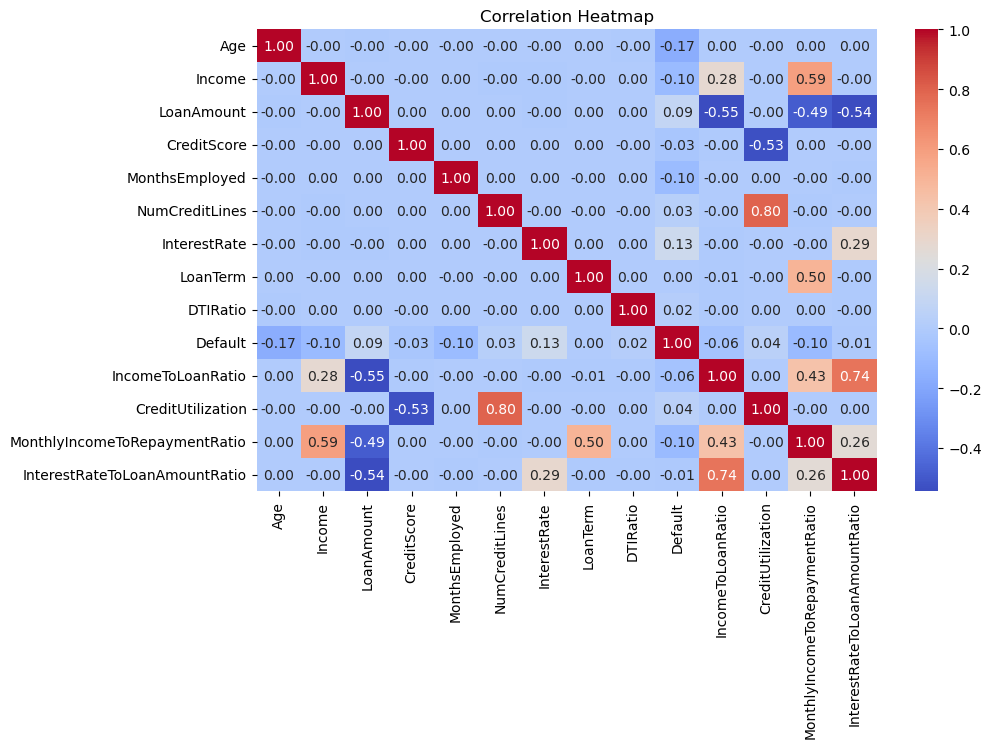

In [57]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
print(f"Class Distribution: {np.bincount(y + 1)}")  # Convert -1,1 back to 0,1 for display


Class Distribution: [     0 225694  29653]


/var/folders/k3/h2kry1d546xfj1d042l_vgt00000gn/T/ipykernel_2004/622489681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


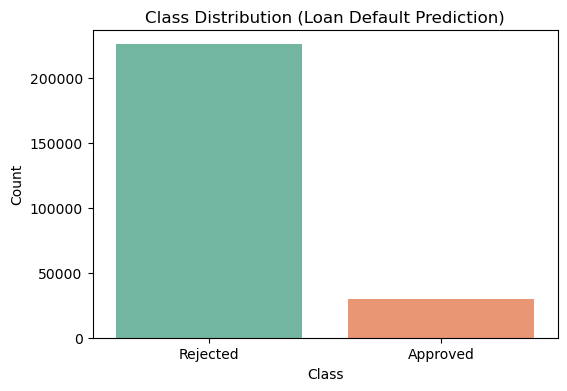

In [18]:

plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="Set2")
plt.title("Class Distribution (Loan Default Prediction)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Rejected", "Approved"])
plt.show()


In [147]:
def process_fit_in_batches(model, X, y, batch_size=1000):
    num_batches = (X.shape[0] + batch_size - 1) // batch_size
    if isinstance(y, pd.Series): y = y.to_numpy()
    for i in range(num_batches):
        start = i * batch_size
        end = min((i + 1) * batch_size, X.shape[0])
        X_batch = X[start:end]
        y_batch = y[start:end]  
        model.fit(X_batch, y_batch)

def process_predict_in_batches(model, X, batch_size=1000):
    num_batches = (X.shape[0] + batch_size - 1) // batch_size
    predictions = []
    for i in range(num_batches):
        start = i * batch_size
        end = min((i + 1) * batch_size, X.shape[0])
        X_batch = X[start:end]
        batch_predictions = model.predict(X_batch)
        predictions.append(batch_predictions)
    return np.concatenate(predictions)


In [62]:
df.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,IncomeToLoanRatio,CreditUtilization,MonthlyIncomeToRepaymentRatio,InterestRateToLoanAmountRatio
0,56,85994,50587,520,80,4,15.23,36,0.44,0,1.699923,0.007692,5760.972222,0.000301
1,69,50432,124440,458,15,1,4.81,60,0.68,0,0.405272,0.002183,2128.666667,0.000039


In [149]:
X=df.drop(['Default'],axis=1)
y=df['Default']

In [107]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,IncomeToLoanRatio,CreditUtilization,MonthlyIncomeToRepaymentRatio,InterestRateToLoanAmountRatio
0,56,85994,50587,520,80,4,15.23,36,0.44,0,1.699923,0.007692,5760.972222,0.000301
1,69,50432,124440,458,15,1,4.81,60,0.68,0,0.405272,0.002183,2128.666667,0.000039
2,46,84208,129188,451,26,3,21.17,24,0.31,1,0.651825,0.006652,1634.500000,0.000164
3,32,31713,44799,743,0,3,7.07,24,0.23,0,0.707895,0.004038,776.125000,0.000158
4,60,20437,9139,633,8,4,6.51,48,0.73,0,2.236240,0.006319,1512.687500,0.000712


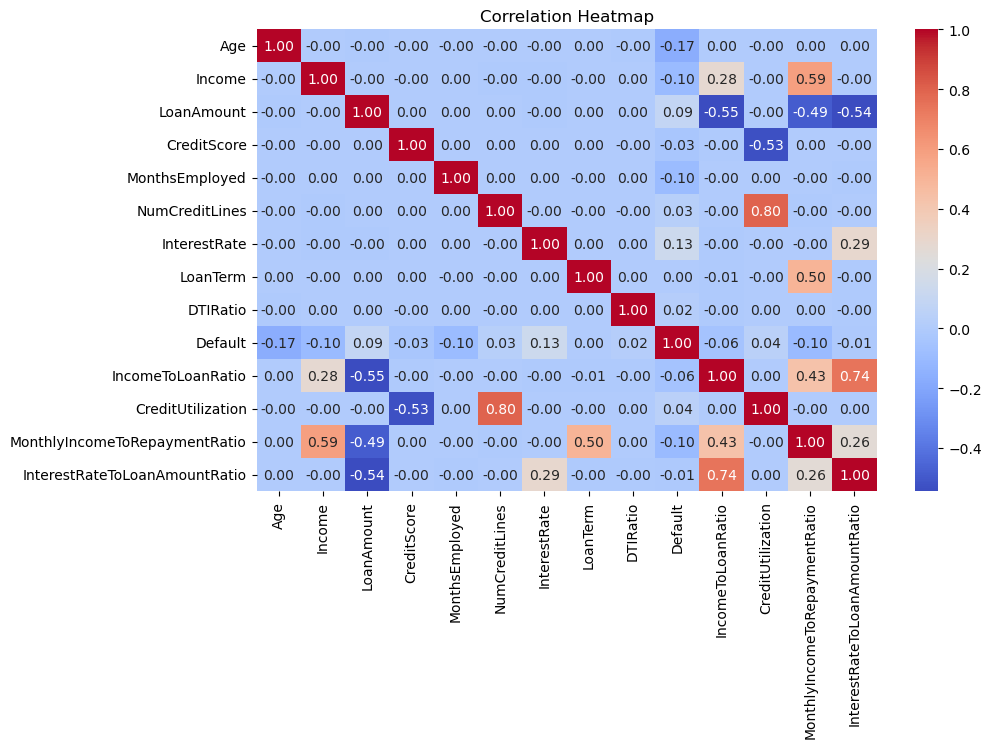

In [150]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [125]:
X=df.drop(['Default'],axis=1)
y=df['Default']

     pcost       dcost       gap    pres   dres
 0: -8.7400e+02 -1.8740e+03  4e+03  1e+00  1e-16
 1: -7.2624e+02 -1.2209e+03  5e+02  1e-02  2e-16
 2: -8.5816e+02 -8.7855e+02  2e+01  6e-04  2e-16
 3: -8.7384e+02 -8.7405e+02  2e-01  6e-06  2e-16
 4: -8.7400e+02 -8.7400e+02  2e-03  6e-08  1e-16
 5: -8.7400e+02 -8.7400e+02  2e-05  6e-10  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.7400e+02 -1.8740e+03  4e+03  1e+00  2e-16
 1: -7.2624e+02 -1.2209e+03  5e+02  1e-02  3e-16
 2: -8.5816e+02 -8.7855e+02  2e+01  6e-04  1e-16
 3: -8.7384e+02 -8.7405e+02  2e-01  6e-06  2e-16
 4: -8.7400e+02 -8.7400e+02  2e-03  6e-08  1e-16
 5: -8.7400e+02 -8.7400e+02  2e-05  6e-10  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.7800e+02 -1.8780e+03  4e+03  1e+00  2e-16
 1: -7.2955e+02 -1.2253e+03  5e+02  1e-02  3e-16
 2: -8.6208e+02 -8.8252e+02  2e+01  6e-04  8e-16
 3: -8.7784e+02 -8.7805e+02  2e-01  6e-06  2e-16
 4: -8.7800e+02 -8.7800e

/opt/homebrew/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


     pcost       dcost       gap    pres   dres
 0: -1.2339e-14 -1.0000e+03  4e+03  1e+00  8e-16
 1:  8.4039e-16 -2.5943e+02  3e+02  1e-02  6e-16
 2: -1.6895e-17 -2.6196e+00  3e+00  1e-04  5e-16
 3: -2.1980e-19 -2.6196e-02  3e-02  1e-06  5e-16
 4: -2.1949e-21 -2.6196e-04  3e-04  1e-08  5e-16
 5: -2.1949e-23 -2.6196e-06  3e-06  1e-10  3e-16
 6: -2.1949e-25 -2.6196e-08  3e-08  1e-12  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3656e-15 -1.0000e+03  4e+03  1e+00  8e-16
 1: -3.9916e-15 -2.5943e+02  3e+02  1e-02  6e-16
 2: -4.8193e-17 -2.6196e+00  3e+00  1e-04  4e-16
 3: -4.6517e-19 -2.6196e-02  3e-02  1e-06  3e-16
 4: -4.6483e-21 -2.6196e-04  3e-04  1e-08  6e-16
 5: -4.6483e-23 -2.6196e-06  3e-06  1e-10  5e-16
 6: -4.6483e-25 -2.6196e-08  3e-08  1e-12  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.9069e-14 -1.0000e+03  4e+03  1e+00  9e-16
 1: -1.1447e-15 -2.5943e+02  3e+02  1e-02  6e-16
 2:  2.3032e-16 -2.6196e

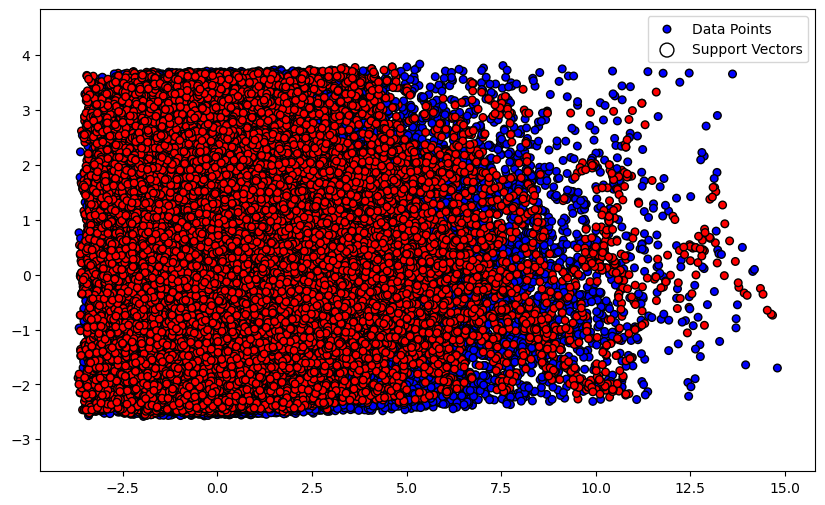

Gaussian SVM results on testing set:


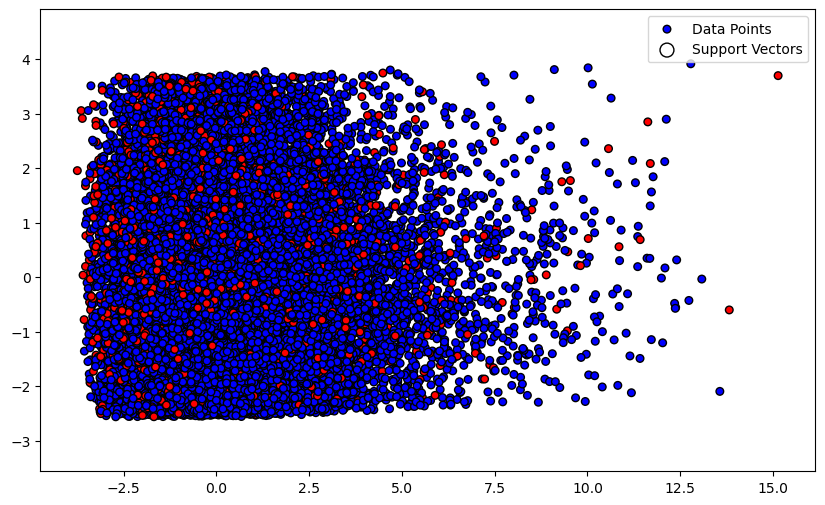

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd  

dict_gaussian = {'kernel_type': 'gaussian', 'gamma': 1, 'C': 1}
svm_gaussian = SoftMarginSVM(dict_gaussian)

batch_size = 1000

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_pca = handle_nan(X_train_scaled)
X_test_pca = handle_nan(X_test_scaled)

smote = SMOTE(sampling_strategy='auto',
    random_state=0,
    k_neighbors=5,)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_resampled = scaler.transform(X_test_pca)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_resampled)



process_fit_in_batches(svm_gaussian, X_train_pca, y_train_resampled, batch_size=batch_size)

print("Gaussian SVM results on training set:")
svm_gaussian.plot_decision_boundary(X_train_pca, y_train_resampled)


y_train_pred = process_predict_in_batches(svm_gaussian, X_train_pca, batch_size=batch_size)

print("Gaussian SVM results on testing set:")
svm_gaussian.plot_decision_boundary(X_test_pca, y_test)


y_test_pred = process_predict_in_batches(svm_gaussian, X_test_pca, batch_size=batch_size)

In [153]:
y_train_pred = np.nan_to_num(y_train_pred, nan=0)  # Replace NaNs with 0
y_test_pred = np.nan_to_num(y_test_pred, nan=0)    # Replace NaNs with 0

In [154]:
evaluate_model(y_train_resampled,y_train_pred)
evaluate_model(y_test,y_test_pred)

Results for :
Accuracy: 0.50
Precision: 0.00


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Recall: 0.00
F1 Score: 0.00
Confusion Matrix:
[[180524      0]
 [180524      0]]

Classification Report:


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homeb

              precision    recall  f1-score   support

           0       0.50      1.00      0.67    180524
           1       0.00      0.00      0.00    180524

    accuracy                           0.50    361048
   macro avg       0.25      0.50      0.33    361048
weighted avg       0.25      0.50      0.33    361048

Results for :
Accuracy: 0.88
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Confusion Matrix:
[[45170     0]
 [ 5900     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     45170
           1       0.00      0.00      0.00      5900

    accuracy                           0.88     51070
   macro avg       0.44      0.50      0.47     51070
weighted avg       0.78      0.88      0.83     51070



/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [75]:
X = df_second_test.drop(columns=['Default','LoanID','Education','EmploymentType','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner'], axis=1)
y=df_second_test['Default']

     pcost       dcost       gap    pres   dres
 0: -8.7400e+02 -1.8740e+03  4e+03  1e+00  1e-16
 1: -7.2624e+02 -1.2209e+03  5e+02  1e-02  1e-16
 2: -8.5816e+02 -8.7855e+02  2e+01  6e-04  3e-16
 3: -8.7384e+02 -8.7405e+02  2e-01  6e-06  2e-16
 4: -8.7400e+02 -8.7400e+02  2e-03  6e-08  1e-16
 5: -8.7400e+02 -8.7400e+02  2e-05  6e-10  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.7400e+02 -1.8740e+03  4e+03  1e+00  1e-16
 1: -7.2624e+02 -1.2209e+03  5e+02  1e-02  5e-16
 2: -8.5816e+02 -8.7855e+02  2e+01  6e-04  2e-16
 3: -8.7384e+02 -8.7405e+02  2e-01  6e-06  3e-16
 4: -8.7400e+02 -8.7400e+02  2e-03  6e-08  3e-16
 5: -8.7400e+02 -8.7400e+02  2e-05  6e-10  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.7800e+02 -1.8780e+03  4e+03  1e+00  1e-16
 1: -7.2955e+02 -1.2253e+03  5e+02  1e-02  1e-16
 2: -8.6208e+02 -8.8252e+02  2e+01  6e-04  1e-16
 3: -8.7784e+02 -8.7805e+02  2e-01  6e-06  2e-16
 4: -8.7800e+02 -8.7800e

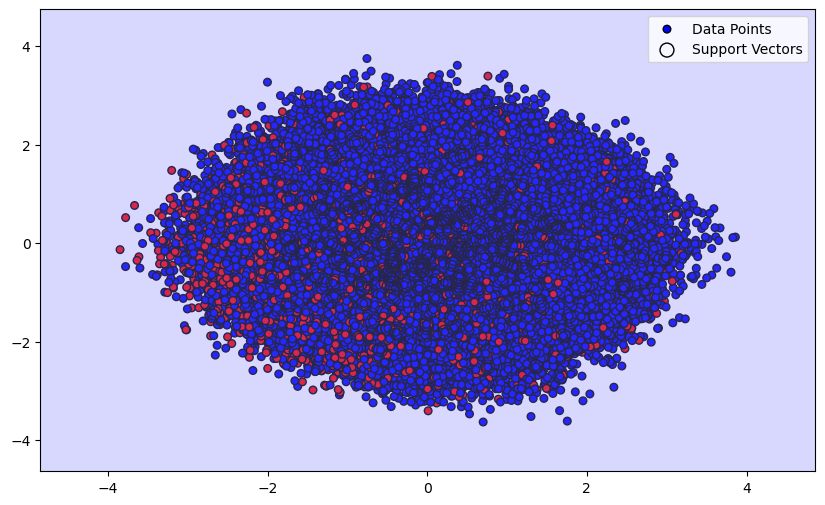

Gaussian SVM results on testing set:


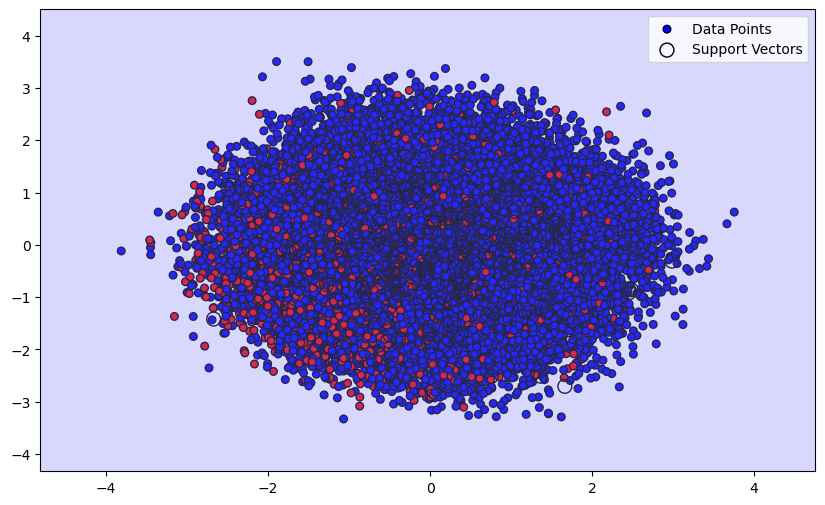

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd  

dict_gaussian = {'kernel_type': 'gaussian', 'gamma': 1, 'C': 1}
svm_gaussian = SoftMarginSVM(dict_gaussian)

batch_size = 1000

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_pca = handle_nan(X_train_scaled)
X_test_pca = handle_nan(X_test_scaled)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)


process_fit_in_batches(svm_gaussian, X_train_pca, y_train, batch_size=batch_size)

print("Gaussian SVM results on training set:")
svm_gaussian.plot_decision_boundary(X_train_pca, y_train)


y_train_pred = process_predict_in_batches(svm_gaussian, X_train_pca, batch_size=batch_size)

print("Gaussian SVM results on testing set:")
svm_gaussian.plot_decision_boundary(X_test_pca, y_test)


y_test_pred = process_predict_in_batches(svm_gaussian, X_test_pca, batch_size=batch_size)


In [79]:
evaluate_model(y_pred=y_train_pred,y_true=y_train,dataset_name="Training")
evaluate_model(y_true=y_test,y_pred=y_test_pred)

Results for Training:
Accuracy: 0.88
Precision: 0.00
Recall: 0.00


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score: 0.00
Confusion Matrix:
[[180524      0]
 [ 23753      0]]

Classification Report:


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94    180524
           1       0.00      0.00      0.00     23753

    accuracy                           0.88    204277
   macro avg       0.44      0.50      0.47    204277
weighted avg       0.78      0.88      0.83    204277

Results for :
Accuracy: 0.88
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Confusion Matrix:
[[45170     0]
 [ 5900     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     45170
           1       0.00      0.00      0.00      5900

    accuracy                           0.88     51070
   macro avg       0.44      0.50      0.47     51070
weighted avg       0.78      0.88      0.83     51070



/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anac